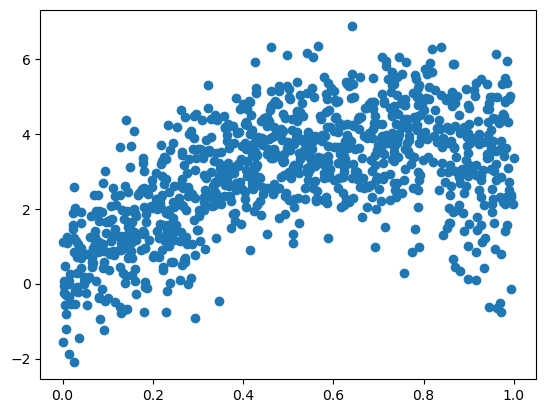

In [2]:
import universalbands as ub
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

case_number = 8
sample_size = 1000
sample_dim = 1
seed = 123

X, Y = ub.data_generation.synthetic_data(
                        case=f"case_{case_number}",
                        sample_size=sample_size,
                        sample_dim=sample_dim,
                        seed=seed,
                        var_dim=1,
                    )
plt.scatter(X,Y)

In [9]:
Y.shape

(200, 200)

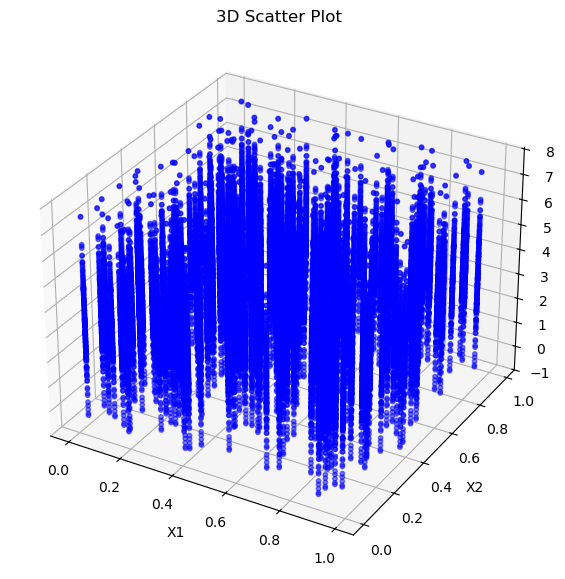

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
case_number = 8
sample_size = 200
sample_dim = 2
seed = 123
kwargs = int(sample_dim / 2) + 1

# Function
def f(x):
    return 2 * np.sin(np.pi * x) + (np.pi * x)

# Beta
beta = np.zeros(shape=(1, sample_dim))
beta[0, 0:kwargs] = 1
beta = beta.T

# Data generation
x = np.random.default_rng(seed=seed).uniform(low=0, high=1, size=(sample_size, sample_dim))
epsilon = np.random.default_rng(seed=seed).normal(0, 1, size=(sample_size, 1))
y = f(np.matmul(x, beta)) + epsilon * np.sqrt(1 + np.matmul(x, beta) ** 2)

# Interactive Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for x1, x2, and y
scatter = ax.scatter(x[:, 0], x[:, 1], y, c='blue', alpha=0.5, s=10)

# Labels
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("3D Scatter Plot")

# Enable interaction
plt.ion()  # Interactive mode
plt.show(block=True)


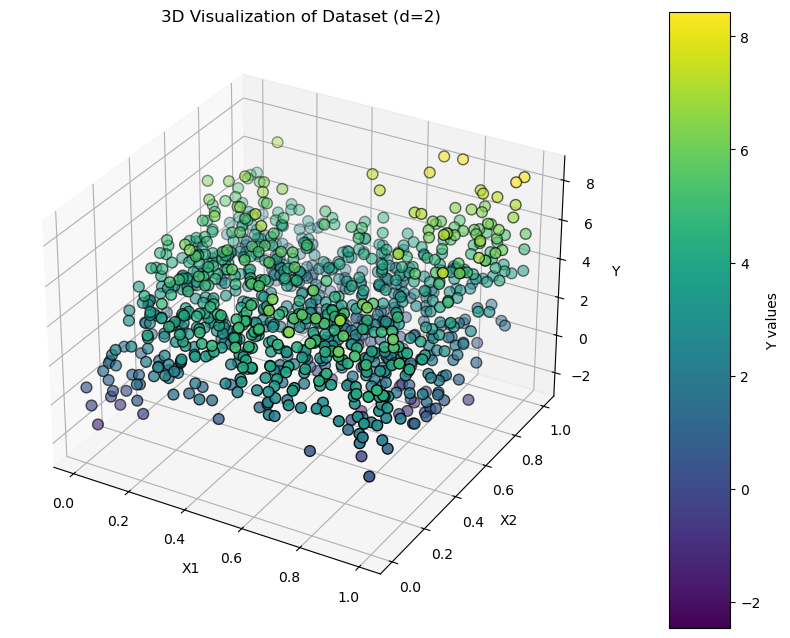

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
d = 2
n_samples = 1000  # Number of samples
beta = np.array([1, 1] + [0] * (d - 2))  # Beta vector with first two elements as 1, rest as 0

# Generate X ~ Unif([0, 1]^d)
X = np.random.uniform(0, 1, size=(n_samples, d))

# Define f(x)
def f(x):
    return 2 * np.sin(np.pi * x) + np.pi * x

# Generate epsilon ~ N(0, 1)
epsilon = np.random.normal(0, 1, size=n_samples)

# Compute Y
beta_X = X @ beta  # Dot product of beta and X
Y = f(beta_X) + epsilon * np.sqrt(1 + beta_X**2)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
sc = ax.scatter(X[:, 0], X[:, 1], Y, c=Y, cmap='viridis', s=60, edgecolor='k')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('3D Visualization of Dataset (d=2)')

# Add color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1, aspect=10, label='Y values')
plt.show()


In [9]:
import numpy as np
import plotly.graph_objects as go

# Parameters
d = 2
n_samples = 1000 # Number of samples
beta = np.array([1, 1] + [0] * (d - 2))  # Beta vector with first two elements as 1, rest as 0

# Generate X ~ Unif([0, 1]^d)
X = np.random.uniform(0, 1, size=(n_samples, d))

# Define f(x)
def f(x):
    return 2 * np.sin(np.pi * x) + np.pi * x

# Generate epsilon ~ N(0, 1)
epsilon = np.random.normal(0, 1, size=n_samples)

# Compute Y
beta_X = X @ beta  # Dot product of beta and X
Y = f(beta_X) + epsilon * np.sqrt(1 + beta_X**2) * 2

# Create an interactive 3D scatter plot with Plotly
fig = go.Figure(
    data=go.Scatter3d(
        x=X[:, 0],
        y=X[:, 1],
        z=Y,
        mode='markers',
        marker=dict(
            size=3,
            color=Y,  # Color based on Y values
            colorscale='Viridis',  # Color scale
            colorbar=dict(title="Y values"),
            opacity=0.8,
        ),
    )
)

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Y',
    ),
    title="Interactive 3D Visualization of Dataset (d=2)",
)

# Show the interactive plot
fig.show()
